### Import Dataset

In [69]:
import pandas as pd
main_dataset = pd.read_csv('./MasterDataset.csv')

### Insert Theta

In [70]:
main_dataset['theta'] = 13.9
main_dataset.loc[main_dataset['n'] == main_dataset['m'] , 'theta'] = 30
main_dataset.loc[main_dataset['m'] ==0  , 'theta'] = 0

# main_dataset

### Insert identifier for Pristine model

In [71]:
df_0 = main_dataset[['Model ID', 'width', 'Length (A)', '1st Natural Freq (GHz)' ,'theta']]
df_0['pristine'] = 1
# df_0

df_1 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 1 %' , 'theta']]
df_1['pristine'] = 0
# df_1

df_2 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 2 %' , 'theta']]
df_2['pristine'] = 0
# df_2

df_3 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 3 %' , 'theta']]
df_3['pristine'] = 0
# df_3

C:\Users\shubh\AppData\Local\Temp\ipykernel_332\3067301796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['pristine'] = 1
C:\Users\shubh\AppData\Local\Temp\ipykernel_332\3067301796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['pristine'] = 0
C:\Users\shubh\AppData\Local\Temp\ipykernel_332\3067301796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

#### Renaming Frequency Columns Header

In [72]:
df_0 = df_0.rename(columns={'1st Natural Freq (GHz)' : 'freq'})
df_1 = df_1.rename(columns={'Defect 1 %': 'freq'})
df_2 = df_2.rename(columns={'Defect 2 %': 'freq'})
df_3 = df_3.rename(columns={'Defect 3 %': 'freq'})

#### Merge dataframes of dataset

In [73]:
df_merged = pd.concat([df_0,df_1,df_2,df_3])
df_merged = df_merged.rename(columns = {'Length (A)' : 'length'})
# df_merged.shape
# df_merged
# df_merged.columns

df_merged.to_csv('./MasterDataset_Mod.csv')

#### ADASYN

In [74]:
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import ADASYN

x=df_merged[['width','theta','freq','length']]
y=df_merged['pristine']

oversample = ADASYN()
x_adasyn,y_adasyn=oversample.fit_resample(x,y)


#### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

x_train_adasyn, x_test, y_train_adasyn, y_test = train_test_split(x_adasyn, y_adasyn, test_size=0.2, random_state=42)

counter=Counter(y)
print('Before',counter)
counter=Counter(y_adasyn)
print('After',counter)

Before Counter({0: 144, 1: 48})
After Counter({1: 152, 0: 144})


#### Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.28      0.36      0.31        22
           1       0.55      0.45      0.49        38

    accuracy                           0.42        60
   macro avg       0.41      0.41      0.40        60
weighted avg       0.45      0.42      0.43        60

Accuracy:  41.67 %


<AxesSubplot:>

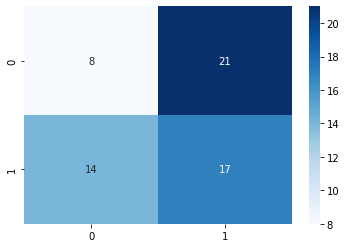

In [76]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_adasyn, y_train_adasyn)
y_pred_mnb = mnb.predict(x_test)
print(classification_report(y_pred_mnb, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_mnb))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')

#### Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.17      0.38      0.24        13
           1       0.74      0.49      0.59        47

    accuracy                           0.47        60
   macro avg       0.46      0.44      0.41        60
weighted avg       0.62      0.47      0.51        60

Accuracy:  46.67 %


<AxesSubplot:>

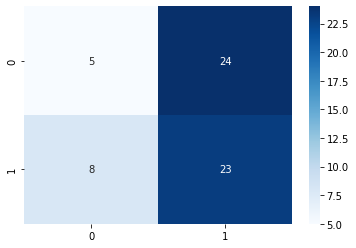

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_adasyn, y_train_adasyn)
y_pred_logreg = logreg.predict(x_test)
print(classification_report(y_pred_logreg, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_logreg))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')

#### K-Nearest Neighbors Classifier

              precision    recall  f1-score   support

           0       0.21      0.23      0.22        26
           1       0.35      0.32      0.34        34

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.29      0.28      0.29        60

Accuracy:  28.33 %


<AxesSubplot:>

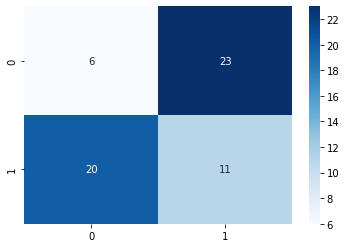

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_adasyn, y_train_adasyn)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_pred_knn, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_knn))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')

#### Linear Support Vector Machine Classifier

              precision    recall  f1-score   support

           0       1.00      0.48      0.65        60
           1       0.00      0.00      0.00         0

    accuracy                           0.48        60
   macro avg       0.50      0.24      0.33        60
weighted avg       1.00      0.48      0.65        60

Accuracy:  48.33 %


d:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to contr

<AxesSubplot:>

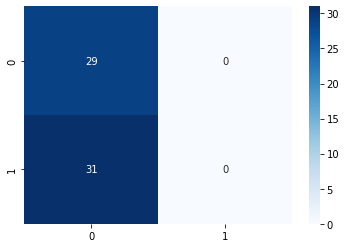

In [79]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x_train_adasyn, y_train_adasyn)
y_pred_lsvc = lsvc.predict(x_test)
print(classification_report(y_pred_lsvc, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_lsvc))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_lsvc), annot=True, fmt='d', cmap='Blues')

#### Support Vector Machine Classifier

              precision    recall  f1-score   support

           0       0.17      0.33      0.23        15
           1       0.68      0.47      0.55        45

    accuracy                           0.43        60
   macro avg       0.42      0.40      0.39        60
weighted avg       0.55      0.43      0.47        60

Accuracy:  43.33 %


<AxesSubplot:>

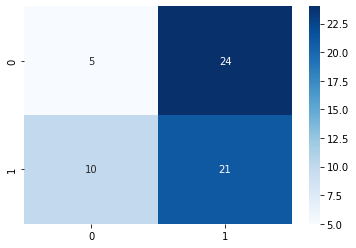

In [80]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_adasyn, y_train_adasyn)
y_pred_svc = svc.predict(x_test)
print(classification_report(y_pred_svc, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_svc))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')

#### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        31
           1       0.74      0.79      0.77        29

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

Accuracy:  76.67 %


<AxesSubplot:>

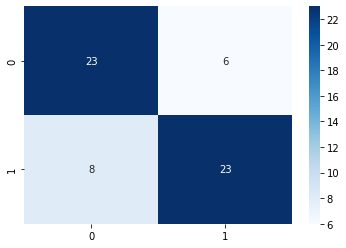

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_adasyn, y_train_adasyn)
y_pred_clf = clf.predict(x_test)
print(classification_report(y_pred_clf, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_clf))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d', cmap='Blues')

#### Bagging Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Accuracy:  78.33 %


<AxesSubplot:>

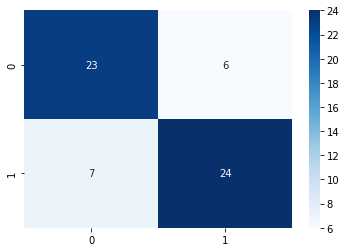

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 

bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=100)
bg.fit(x_train_adasyn, y_train_adasyn)
y_pred_bg = bg.predict(x_test)
print(classification_report(y_pred_bg, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_bg))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_bg), annot=True, fmt='d', cmap='Blues')


#### Bosoting Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.77      0.86      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

Accuracy:  81.67 %


<AxesSubplot:>

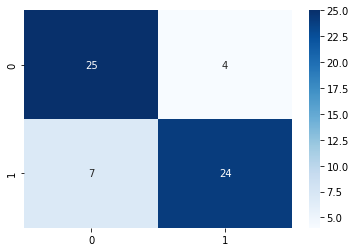

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train_adasyn, y_train_adasyn)

y_pred_adb = adb.predict(x_test)
print(classification_report(y_pred_adb, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_adb))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_adb), annot=True, fmt='d', cmap='Blues')


#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.77      0.83      0.80        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Accuracy:  80.0 %


<AxesSubplot:>

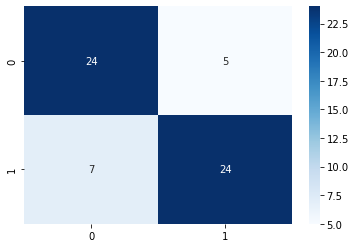

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(x_train_adasyn, y_train_adasyn)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_pred_rf, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_rf))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
